In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA 

<AxesSubplot:>

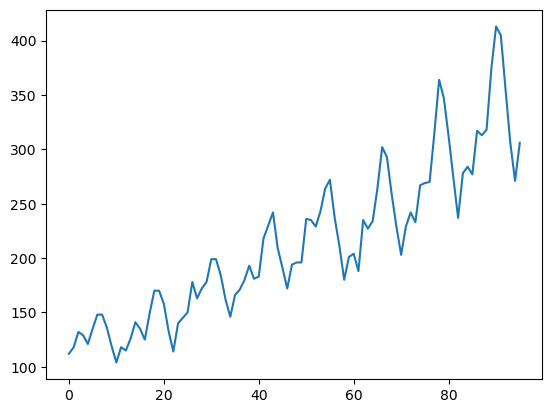

In [2]:
data = pd.read_excel('Airlines+Data.xlsx') 
data.Passengers.plot() 

In [3]:
data.shape

(96, 2)

In [4]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")


data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") #Year extraction

In [5]:
data 

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [6]:
data1= data.drop(['Month'], axis=1)
data1 

,Passengers,Date,month,year
0,112,1995-01-01,Jan,1995
1,118,1995-02-01,Feb,1995
2,132,1995-03-01,Mar,1995
3,129,1995-04-01,Apr,1995
4,121,1995-05-01,May,1995
...,...,...,...,...
91,405,2002-08-01,Aug,2002
92,355,2002-09-01,Sep,2002
93,306,2002-10-01,Oct,2002
94,271,2002-11-01,Nov,2002


# Visualisation

**Heat map**

<AxesSubplot:xlabel='month', ylabel='year'>

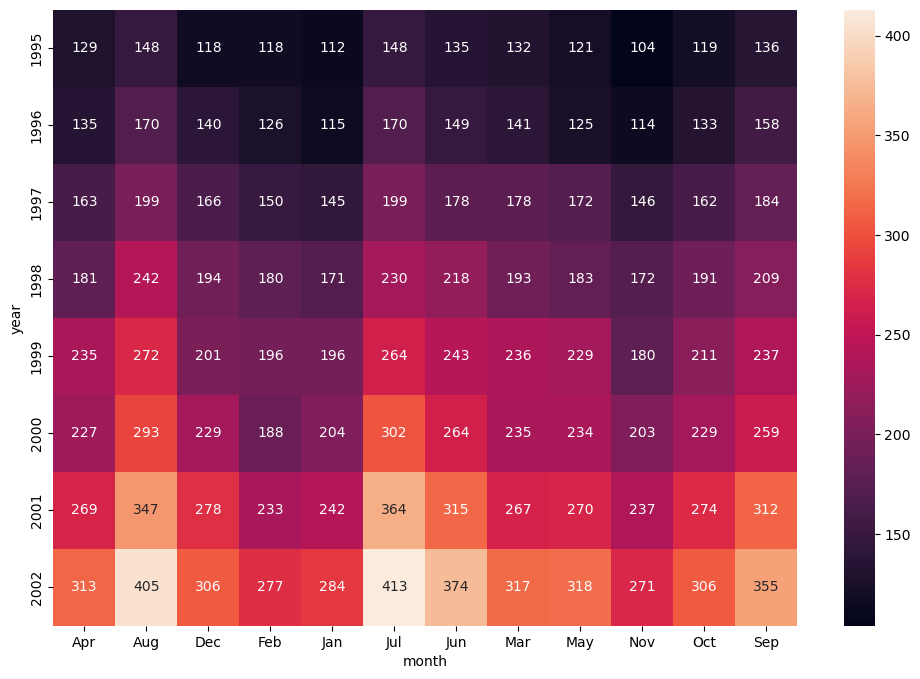

In [7]:
plt.figure(figsize=(12,8))
heatmap_year_month = pd.pivot_table(data=data1,values="Passengers", index="year", columns="month",aggfunc="mean",fill_value=0,)
sns.heatmap(heatmap_year_month,annot=True,fmt="g")

**Box Plot** 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

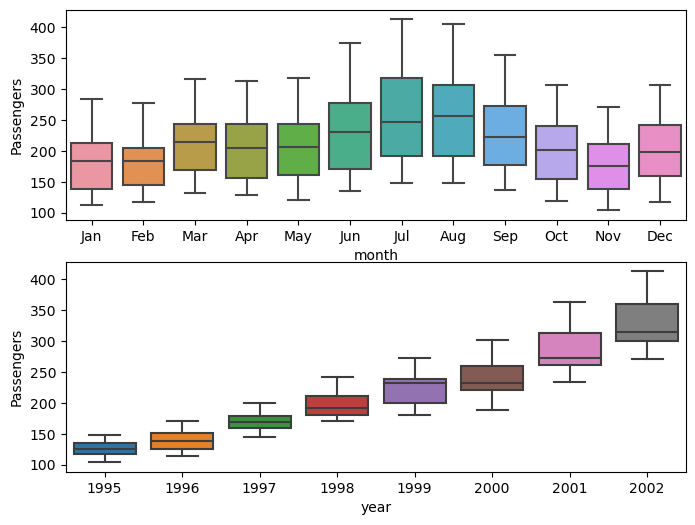

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data1) 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

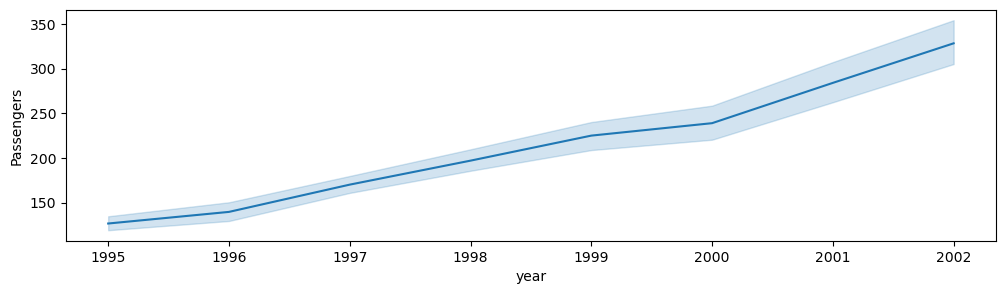

In [9]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data1)  

# Data Driven Forecasting Methods

In [10]:
data1

,Passengers,Date,month,year
0,112,1995-01-01,Jan,1995
1,118,1995-02-01,Feb,1995
2,132,1995-03-01,Mar,1995
3,129,1995-04-01,Apr,1995
4,121,1995-05-01,May,1995
...,...,...,...,...
91,405,2002-08-01,Aug,2002
92,355,2002-09-01,Sep,2002
93,306,2002-10-01,Oct,2002
94,271,2002-11-01,Nov,2002


In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**Splitting Data**

In [12]:
Train = data1.head(84)
Test = data1.tail(12) 

In [13]:
Train

,Passengers,Date,month,year
0,112,1995-01-01,Jan,1995
1,118,1995-02-01,Feb,1995
2,132,1995-03-01,Mar,1995
3,129,1995-04-01,Apr,1995
4,121,1995-05-01,May,1995
...,...,...,...,...
79,347,2001-08-01,Aug,2001
80,312,2001-09-01,Sep,2001
81,274,2001-10-01,Oct,2001
82,237,2001-11-01,Nov,2001


In [14]:
Test 

,Passengers,Date,month,year
84,284,2002-01-01,Jan,2002
85,277,2002-02-01,Feb,2002
86,317,2002-03-01,Mar,2002
87,313,2002-04-01,Apr,2002
88,318,2002-05-01,May,2002
89,374,2002-06-01,Jun,2002
90,413,2002-07-01,Jul,2002
91,405,2002-08-01,Aug,2002
92,355,2002-09-01,Sep,2002
93,306,2002-10-01,Oct,2002


# Moving Average Method

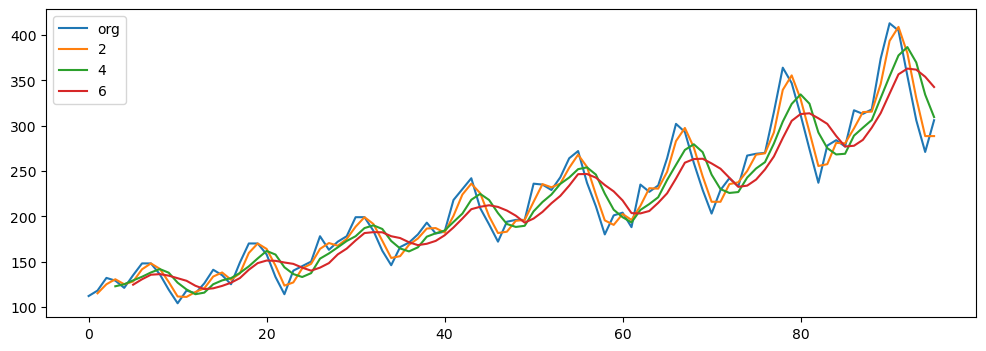

In [15]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 

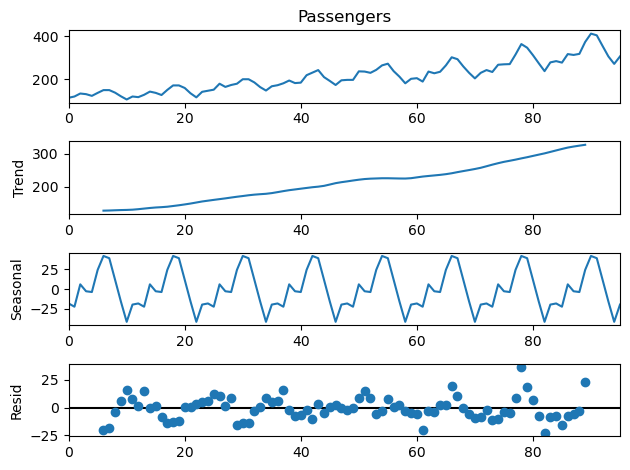

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

# Evaluation Metric RMSE

In [17]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse 

# Simple Exponential Method

In [18]:
Train["Passengers"] = Train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.Passengers)   

64.84476396990497

# Holt method 

In [19]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model 

58.57776020000329

# Holts winter exponential smoothing with additive seasonality and additive trend

In [20]:
hw_ex_model = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_ex = hw_ex_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ex = RMSE(Test.Passengers, pred_ex)
rmse_ex 

63.14440376379176

# Holts winter exponential smoothing with multiplicative seasonality and additive trend 

In [21]:
hw_mul_model = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_mul = hw_mul_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_mul = RMSE(Test.Passengers, pred_mul)
rmse_mul 

64.7248143801876

# Final Model by combining train and test

In [22]:
data1["Passengers"] = data1["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()  

In [23]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)     

96     292.600248
97     291.533423
98     307.400166
99     313.871377
100    300.083208
101    298.941735
102    315.162364
103    321.747261
104    307.566168
105    306.350047
dtype: float64

# Now Working on 

# **Model based Forecasting Methods**

In [24]:
data1.shape

(96, 4)

In [25]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_psngr"] = np.log(data1["Passengers"])

data1.head() 

,Passengers,Date,month,year,t,t_squared,log_psngr
0,112.0,1995-01-01,Jan,1995,1,1,4.718499
1,118.0,1995-02-01,Feb,1995,2,4,4.770685
2,132.0,1995-03-01,Mar,1995,3,9,4.882802
3,129.0,1995-04-01,Apr,1995,4,16,4.859812
4,121.0,1995-05-01,May,1995,5,25,4.795791


In [26]:
month_Dummies = pd.DataFrame(pd.get_dummies(data1['month']))
data1 = pd.concat([data1,month_Dummies],axis = 1)
data1.head() 

,Passengers,Date,month,year,t,t_squared,log_psngr,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112.0,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,118.0,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,132.0,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,129.0,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,121.0,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# Splitting data 

In [27]:
Test_data = data1.head(84)
Train_data = data1.tail(12)

In [28]:
Test_data 

,Passengers,Date,month,year,t,t_squared,log_psngr,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112.0,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,118.0,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,132.0,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,129.0,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,121.0,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,347.0,2001-08-01,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,312.0,2001-09-01,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,274.0,2001-10-01,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,237.0,2001-11-01,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
Train_data 

,Passengers,Date,month,year,t,t_squared,log_psngr,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,284.0,2002-01-01,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,277.0,2002-02-01,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,317.0,2002-03-01,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,313.0,2002-04-01,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,318.0,2002-05-01,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,374.0,2002-06-01,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,413.0,2002-07-01,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,405.0,2002-08-01,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,355.0,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,306.0,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


# Linear Model 

In [30]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train_data).fit()
pred_lin =  pd.Series(linear_model.predict(pd.DataFrame(Test_data['t'])))
rmse_lin_model = RMSE(Test_data['Passengers'], pred_lin)
rmse_lin_model

37.68438230451736

# Exponential Model

In [31]:
Exp = smf.ols('log_psngr~t',data=Train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_data['t'])))
rmse_Exp_model = RMSE(Test_data['Passengers'], np.exp(pred_Exp))
rmse_Exp_model 

53.920176693772866

# Quadratic Model 

In [32]:
Quad = smf.ols('Passengers~t + t_squared',data=Train_data).fit()
pred_Quad = pd.Series(Quad.predict(Test_data[["t","t_squared"]]))
rmse_Quad = RMSE(Test_data['Passengers'], pred_Quad)
rmse_Quad  

12212.664911147558

# Additive seasonality  

In [33]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(Test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = RMSE(Test_data['Passengers'], pred_add_sea)
rmse_add_sea 

143.10261053823282

# Additive Seasonality Quadratic 

In [34]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test_data['Passengers'], pred_add_sea_quad)
rmse_add_sea_quad 

85.77729791967165

# Multiplicative Seasonality

In [35]:
Mul_sea = smf.ols('log_psngr~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test_data))
rmse_Mult_sea = RMSE(Test_data['Passengers'], pred_Mult_sea)
rmse_Mult_sea 

200.24163926855385

# Multiplicative Additive Seasonality 

In [36]:
Mul_Add_sea = smf.ols('log_psngr~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test_data))
rmse_Mult_add_sea = RMSE(Test_data['Passengers'], pred_Mult_add_sea)
rmse_Mult_add_sea  

202.48319224473553

# Comparing the results 

In [37]:
data2 = {"MODEL":pd.Series(["rmse_lin_model","rmse_Exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_lin_model,rmse_Exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data2)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
0,rmse_lin_model,37.684382
1,rmse_Exp_model,53.920177
4,rmse_add_sea_quad,85.777298
3,rmse_add_sea,143.102611
5,rmse_Mult_sea,200.241639
6,rmse_Mult_add_sea,202.483192
2,rmse_Quad,12212.664911


In [38]:
data1

,Passengers,Date,month,year,t,t_squared,log_psngr,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112.0,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,118.0,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,132.0,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,129.0,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,121.0,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405.0,2002-08-01,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,355.0,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,306.0,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,271.0,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
#Build the model on entire data set
full_model = smf.ols('Passengers~t', data=data1).fit() 

In [40]:
pred_new  = pd.Series(linear_model.predict(data1)) 
pred_new  

0     133.916084
1     136.087413
2     138.258741
3     140.430070
4     142.601399
         ...    
91    331.506993
92    333.678322
93    335.849650
94    338.020979
95    340.192308
Length: 96, dtype: float64

In [41]:
data1["forecasted_Passengers"] = pd.Series(pred_new) 

In [42]:
data1 

,Passengers,Date,month,year,t,t_squared,log_psngr,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,112.0,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,133.916084
1,118.0,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,136.087413
2,132.0,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,138.258741
3,129.0,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,140.430070
4,121.0,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,142.601399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405.0,2002-08-01,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0,331.506993
92,355.0,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1,333.678322
93,306.0,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0,335.849650
94,271.0,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0,338.020979


# ARIMA Model 

In [43]:
import warnings
warnings.filterwarnings('ignore')
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [44]:
airline = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)   

In [45]:
# To install the library
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to Airlines Passengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.23 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.35 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Thu, 15 Jun 2023   AIC                            615.965
Time:                                    14:45:47   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model to AirPassengers dataset

In [46]:
# Split data into train / test sets
trainn = airline.iloc[:len(airline)-12]
testt = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(trainn['Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Thu, 15 Jun 2023   AIC                            533.783
Time:                                    14:45:49   BIC                            545.097
Sample:                                01-01-1995   HQIC                           538.282
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2146      0.112     -1.913      0.056      -0.434       0.005
ar.S.L12      -1.2045      0.876     -1.375      0.169      -2.921       0.512
ar.S.L24      -0.3644      0.246     -1.480      0.139      -0.847       0.118
ma.S.L12       0.9992    120.037      0.008      0.993    -234.268     236.266
sigma2        83.4275   9945.464      0.008      0.993   -1.94e+04    1.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions of ARIMA Model against the test 

<AxesSubplot:xlabel='Month'>

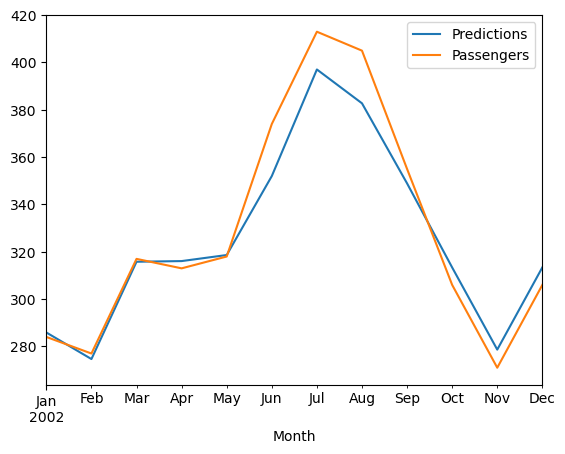

In [47]:
start = len(trainn)
end = len(trainn) + len(testt) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
testt['Passengers'].plot(legend = True) 

# Evaluate the model using MSE and RMSE 

In [48]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(testt["Passengers"], predictions)

11.02631604057878

In [49]:
# Calculate mean squared error
mean_squared_error(testt["Passengers"], predictions)

121.57964542672492

# Forecast using ARIMA Model

<AxesSubplot:xlabel='Month'>

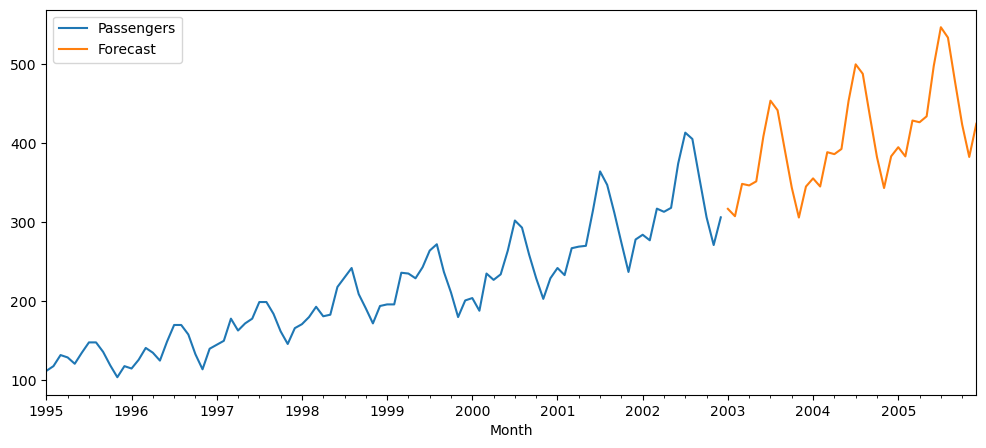

In [50]:
# Train the model on the full dataset
model = model = SARIMAX(airline['Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True) 